In [1]:
import pandas as pd
import numpy as np # scientific computi
import seaborn as sns # statistical ploting
import matplotlib.pyplot as plt
%matplotlib inline
import math # besic math functions

In [2]:
from sqlalchemy import create_engine
import psycopg2

In [3]:

# Create an engine instance

#alchemyEngine   = create_engine('postgresql+psycopg2://postgres:Rinish@21@127.0.0.1:5432/hotel_data', pool_recycle=3600);

 # Connect to PostgreSQL server

#dbConnection    = alchemyEngine.connect();

 

# Read data from PostgreSQL database table and load into a DataFrame instance

#data_2       = pds.read_sql("select * from \"StudentScores\"", dbConnection);

#data_3       = pds.read_sql("select * from \"StudentScores\"", dbConnection);
 

#pds.set_option('display.expand_frame_repr', False);

 

# Print the DataFrame

#print(data_2);
#print(data_3);
 

# Close the database connection

#dbConnection.close();

In [4]:
data_2=pd.read_csv(r'R:\project\data_2.csv')
data_3=pd.read_csv(r'R:\project\DATA_3_1.CSV')

In [5]:
data_2.head()

,county,inspection_grade,inspection_date,owner_name,trade_name,city,zipcode,latitude,longitude
0,New York,C,2020-02-05T00:00:00.000,7-ELEVEN INC,7 ELEVEN STORE #35630J,NEW YORK,10001,40.746712,-73.997438
1,New York,C,2020-02-05T00:00:00.000,7-ELEVEN INC,7 ELEVEN STORE #35630J,NEW YORK,10001,40.746712,-73.997438
2,New York,B,2020-03-09T00:00:00.000,9TH GROCERY INC,9TH GROCERY,NEW YORK,10001,40.750925,-73.998106
3,New York,A,2020-12-03T00:00:00.000,DYLANS CANDY BAR LLC,DYLANS CANDY BAR,NEW YORK,10001,41.093614,-74.314599
4,New York,C,2020-02-05T00:00:00.000,7-ELEVEN INC,7 ELEVEN STORE #35630J,NEW YORK,10001,40.746712,-73.997438


In [6]:
data_3.head()

,restaurant_item_name,restaurant,food_category,kids_meal,limited_time_offer,regional,shareable,calories_100g,total_fat_100g,saturated_fat_100g,sodium_100g,carbohydrates_100g,protein_100g,dietary_fiber_100g
0,7 ELEVEN STORE #35630J Blue Raspberry Slurpee,7 ELEVEN STORE #35630J,Beverages,0,0,0,0,29,0,0,1,7,0,0
1,7 ELEVEN STORE #35630J Coca-Cola Slurpee,7 ELEVEN STORE #35630J,Beverages,0,0,0,0,29,0,0,3,8,0,0
2,7 ELEVEN STORE #35630J Cotton Candy Slurpee,7 ELEVEN STORE #35630J,Beverages,0,0,0,0,29,0,0,3,7,0,0
3,7 ELEVEN STORE #35630J Pina Colada Slurpee,7 ELEVEN STORE #35630J,Beverages,0,0,0,0,29,0,0,3,8,0,0
4,7 ELEVEN STORE #35630J Wild Cherry Slurpee,7 ELEVEN STORE #35630J,Beverages,0,0,0,0,29,0,0,3,8,0,0


In [7]:
data_3.restaurant.unique()

array(['7 ELEVEN STORE #35630J', 'BIG APPLE FOOD MARKET',
       'HARBOR CONVENIENCE CORP', 'AUNTIE ELS FARM MARKET',
       'BASSEL DELI GROCERY', 'BOBS DELI AND GROCERY INC',
       'BOR KEE FOOD MARKET INC', 'NY GRILL & DELI', 'ABDOU KINGS DELI',
       'CO-HEN KITCHEN', 'CAPTAIN COOKS SEAFOOD M', 'CARLOS FISH MARKET',
       'EAST VILLAGE DELI & GRI', 'J&J GENERAL STORES',
       '525 CARLE PLACE DRIVE T', 'CHILI EXPRESS',
       'CHILI EXPRESSCHILI MINI MART', 'CHUCKY FRESH MARKET',
       'YAFI FRIED CHICKEN DELI', 'GALO DELI & PIZZA',
       'CULVER & CLIFFORD', 'QUEEN AFRICAN MARKET', 'TACOS-VIP',
       'DENNY FOOD MART', 'DICKS COUNTRY STORE', "DOMINGO'S GROCERY",
       'DUNKIN DONUTS', "EINHORN'S", 'MUCHO LOCO DELI&GROCERY',
       '367 FAMOUS DELI', 'FIREHOUSE DELI AND GRIL', 'FIVE STAR GOURMET',
       'BIG BOYS DELI', 'D&S GOLDEN DELI & GROCE', 'PREFERRED PHARMACY',
       'RIHANNA DELI GROCERY', 'THREE KINGS DELI GROCER', 'LABORBOX',
       'Jamba Juice', 'JASONS DELI',

In [8]:
unique_hotel_data3 = len(pd.unique(data_3['restaurant']))
unique_hotel_data3

87

In [9]:
data_2.trade_name.unique()

array(['7 ELEVEN STORE #35630J', '9TH GROCERY', 'DYLANS CANDY BAR', ...,
       'BUFFALO CONVENIENCE STO', 'DOLLAR GENERAL #10820',
       'WEST END BEVERAGE&GRCY'], dtype=object)

In [10]:
unique_hotel_data2 = len(pd.unique(data_2['trade_name']))
unique_hotel_data2

18960

In [11]:
data_2.rename(columns = {'trade_name':'restaurant'}, inplace = True)

In [12]:
data_2.head()

,county,inspection_grade,inspection_date,owner_name,restaurant,city,zipcode,latitude,longitude
0,New York,C,2020-02-05T00:00:00.000,7-ELEVEN INC,7 ELEVEN STORE #35630J,NEW YORK,10001,40.746712,-73.997438
1,New York,C,2020-02-05T00:00:00.000,7-ELEVEN INC,7 ELEVEN STORE #35630J,NEW YORK,10001,40.746712,-73.997438
2,New York,B,2020-03-09T00:00:00.000,9TH GROCERY INC,9TH GROCERY,NEW YORK,10001,40.750925,-73.998106
3,New York,A,2020-12-03T00:00:00.000,DYLANS CANDY BAR LLC,DYLANS CANDY BAR,NEW YORK,10001,41.093614,-74.314599
4,New York,C,2020-02-05T00:00:00.000,7-ELEVEN INC,7 ELEVEN STORE #35630J,NEW YORK,10001,40.746712,-73.997438


In [13]:
mrg_data_1 = data_2.merge(data_3, how = 'inner', on = ['restaurant'])

In [14]:
mrg_data_1

,county,inspection_grade,inspection_date,owner_name,restaurant,city,zipcode,latitude,longitude,restaurant_item_name,...,limited_time_offer,regional,shareable,calories_100g,total_fat_100g,saturated_fat_100g,sodium_100g,carbohydrates_100g,protein_100g,dietary_fiber_100g
0,New York,C,2020-02-05T00:00:00.000,7-ELEVEN INC,7 ELEVEN STORE #35630J,NEW YORK,10001,40.746712,-73.997438,7 ELEVEN STORE #35630J Blue Raspberry Slurpee,...,0,0,0,29,0,0,1,7,0,0
1,New York,C,2020-02-05T00:00:00.000,7-ELEVEN INC,7 ELEVEN STORE #35630J,NEW YORK,10001,40.746712,-73.997438,7 ELEVEN STORE #35630J Coca-Cola Slurpee,...,0,0,0,29,0,0,3,8,0,0
2,New York,C,2020-02-05T00:00:00.000,7-ELEVEN INC,7 ELEVEN STORE #35630J,NEW YORK,10001,40.746712,-73.997438,7 ELEVEN STORE #35630J Cotton Candy Slurpee,...,0,0,0,29,0,0,3,7,0,0
3,New York,C,2020-02-05T00:00:00.000,7-ELEVEN INC,7 ELEVEN STORE #35630J,NEW YORK,10001,40.746712,-73.997438,7 ELEVEN STORE #35630J Pina Colada Slurpee,...,0,0,0,29,0,0,3,8,0,0
4,New York,C,2020-02-05T00:00:00.000,7-ELEVEN INC,7 ELEVEN STORE #35630J,NEW YORK,10001,40.746712,-73.997438,7 ELEVEN STORE #35630J Wild Cherry Slurpee,...,0,0,0,29,0,0,3,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268623,Monroe,A,2021-01-06T00:00:00.000,CHILI EXPRESS MART INC,CHILI EXPRESS,ROCHESTER,14611,43.141442,-77.662429,"CHILI EXPRESS Sweet Wine, 9 fl oz",...,0,0,0,98,0,0,14,6,0,0
268624,Monroe,A,2021-01-06T00:00:00.000,CHILI EXPRESS MART INC,CHILI EXPRESS,ROCHESTER,14611,43.141442,-77.662429,"CHILI EXPRESS Thousand Island Dressing, 1.5 fl oz",...,0,0,0,470,47,7,917,16,0,0
268625,Monroe,A,2021-01-06T00:00:00.000,CHILI EXPRESS MART INC,CHILI EXPRESS,ROCHESTER,14611,43.141442,-77.662429,"CHILI EXPRESS Thousand Island Dressing, 2 fl oz",...,0,0,0,476,46,7,917,16,2,0
268626,Monroe,A,2021-01-06T00:00:00.000,CHILI EXPRESS MART INC,CHILI EXPRESS,ROCHESTER,14611,43.141442,-77.662429,"CHILI EXPRESS White Wine, 6 fl oz",...,0,0,0,82,0,0,6,3,0,0


In [15]:
unique_hotel_merge = len(pd.unique(mrg_data_1['restaurant']))
unique_hotel_merge

75

In [16]:
# df = df['col_name'].replace({'G': 1})
mrg_data_1.columns

Index(['county', 'inspection_grade', 'inspection_date', 'owner_name',
       'restaurant', 'city', 'zipcode', 'latitude', 'longitude',
       'restaurant_item_name', 'food_category', 'kids_meal',
       'limited_time_offer', 'regional', 'shareable', 'calories_100g',
       'total_fat_100g', 'saturated_fat_100g', 'sodium_100g',
       'carbohydrates_100g', 'protein_100g', 'dietary_fiber_100g'],
      dtype='object')

In [17]:
data1_fin= mrg_data_1.drop(["inspection_date","county","owner_name",'city','regional','latitude','longitude'],axis=1)

In [18]:
data1_fin

,inspection_grade,restaurant,zipcode,restaurant_item_name,food_category,kids_meal,limited_time_offer,shareable,calories_100g,total_fat_100g,saturated_fat_100g,sodium_100g,carbohydrates_100g,protein_100g,dietary_fiber_100g
0,C,7 ELEVEN STORE #35630J,10001,7 ELEVEN STORE #35630J Blue Raspberry Slurpee,Beverages,0,0,0,29,0,0,1,7,0,0
1,C,7 ELEVEN STORE #35630J,10001,7 ELEVEN STORE #35630J Coca-Cola Slurpee,Beverages,0,0,0,29,0,0,3,8,0,0
2,C,7 ELEVEN STORE #35630J,10001,7 ELEVEN STORE #35630J Cotton Candy Slurpee,Beverages,0,0,0,29,0,0,3,7,0,0
3,C,7 ELEVEN STORE #35630J,10001,7 ELEVEN STORE #35630J Pina Colada Slurpee,Beverages,0,0,0,29,0,0,3,8,0,0
4,C,7 ELEVEN STORE #35630J,10001,7 ELEVEN STORE #35630J Wild Cherry Slurpee,Beverages,0,0,0,29,0,0,3,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268623,A,CHILI EXPRESS,14611,"CHILI EXPRESS Sweet Wine, 9 fl oz",Beverages,0,0,0,98,0,0,14,6,0,0
268624,A,CHILI EXPRESS,14611,"CHILI EXPRESS Thousand Island Dressing, 1.5 fl oz",Toppings & Ingredients,0,0,0,470,47,7,917,16,0,0
268625,A,CHILI EXPRESS,14611,"CHILI EXPRESS Thousand Island Dressing, 2 fl oz",Toppings & Ingredients,0,0,0,476,46,7,917,16,2,0
268626,A,CHILI EXPRESS,14611,"CHILI EXPRESS White Wine, 6 fl oz",Beverages,0,0,0,82,0,0,6,3,0,0


In [19]:
data1_fin.duplicated().sum()

228392

In [20]:
final_data_2_3= data1_fin.drop_duplicates()

In [21]:
final_data_2_3

,inspection_grade,restaurant,zipcode,restaurant_item_name,food_category,kids_meal,limited_time_offer,shareable,calories_100g,total_fat_100g,saturated_fat_100g,sodium_100g,carbohydrates_100g,protein_100g,dietary_fiber_100g
0,C,7 ELEVEN STORE #35630J,10001,7 ELEVEN STORE #35630J Blue Raspberry Slurpee,Beverages,0,0,0,29,0,0,1,7,0,0
1,C,7 ELEVEN STORE #35630J,10001,7 ELEVEN STORE #35630J Coca-Cola Slurpee,Beverages,0,0,0,29,0,0,3,8,0,0
2,C,7 ELEVEN STORE #35630J,10001,7 ELEVEN STORE #35630J Cotton Candy Slurpee,Beverages,0,0,0,29,0,0,3,7,0,0
3,C,7 ELEVEN STORE #35630J,10001,7 ELEVEN STORE #35630J Pina Colada Slurpee,Beverages,0,0,0,29,0,0,3,8,0,0
4,C,7 ELEVEN STORE #35630J,10001,7 ELEVEN STORE #35630J Wild Cherry Slurpee,Beverages,0,0,0,29,0,0,3,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268600,A,CHILI EXPRESS,14611,"CHILI EXPRESS O'Douls, 12 fl oz",Beverages,0,0,0,18,0,0,0,4,0,0
268601,A,CHILI EXPRESS,14611,"CHILI EXPRESS Ranch, 2 fl oz",Toppings & Ingredients,0,0,0,476,42,7,705,5,4,0
268609,A,CHILI EXPRESS,14611,"CHILI EXPRESS Santa Fe Dressing, 2 fl oz",Toppings & Ingredients,0,0,0,476,49,8,1235,7,2,2
268614,A,CHILI EXPRESS,14611,"CHILI EXPRESS Sierra Nevada Pale Ale, 12 fl oz",Beverages,0,0,0,53,0,0,3,4,1,0


In [22]:
final_data_2_3.to_csv(r'R:\project\final_data_2_3.csv', index=False)

In [23]:
#calories_mean = final_data_2_3.groupby('restaurant')['calories_100g'].mean()[['name', 'id', 'dept', 'total_sale']]

In [24]:
#calories_mean

In [25]:
final_data_average = final_data_2_3.groupby('restaurant').mean()[['calories_100g', 'total_fat_100g', 'saturated_fat_100g', 'saturated_fat_100g','sodium_100g','carbohydrates_100g','protein_100g','dietary_fiber_100g']]

In [26]:
final_data_average 

,calories_100g,total_fat_100g,saturated_fat_100g,saturated_fat_100g,sodium_100g,carbohydrates_100g,protein_100g,dietary_fiber_100g
restaurant,,,,,,,,
226 JIMMY DELI GROCERY,264.763158,10.710526,2.815789,2.815789,3197.789474,32.065789,10.250000,7.065789
3635 SILVER SADDLE DELI,110.000000,5.079137,1.366906,1.366906,275.611511,14.079137,2.647482,0.460432
367 FAMOUS DELI,203.710526,12.684211,2.934211,2.934211,596.802632,15.881579,7.171053,3.052632
525 CARLE PLACE DRIVE T,82.546875,2.468750,1.328125,1.328125,214.859375,13.703125,1.281250,0.375000
7 ELEVEN STORE #35630J,116.727273,4.727273,1.954545,1.954545,237.272727,14.363636,3.909091,0.500000
...,...,...,...,...,...,...,...,...
WHITE STREET DELI GROCE,139.582953,7.033486,2.397260,2.397260,235.602740,15.429224,3.789954,0.595129
WING LONG TRADING,302.685185,22.592593,5.148148,5.148148,558.425926,6.777778,13.296296,0.277778
YAFI FRIED CHICKEN DELI,136.955665,7.000000,1.802956,1.802956,312.354680,15.064039,3.985222,0.635468


In [27]:
grade_merge = pd.DataFrame([final_data_2_3.inspection_grade, final_data_2_3.restaurant]).transpose()

In [28]:
averae_merge = pd.DataFrame(final_data_average )

In [29]:
averae_merge.corr()

,calories_100g,total_fat_100g,saturated_fat_100g,saturated_fat_100g,sodium_100g,carbohydrates_100g,protein_100g,dietary_fiber_100g
calories_100g,1.000000,0.945735,0.882409,0.882409,0.575787,0.545430,0.545169,0.399755
total_fat_100g,0.945735,1.000000,0.834266,0.834266,0.458282,0.318120,0.393229,0.203161
saturated_fat_100g,0.882409,0.834266,1.000000,1.000000,0.447074,0.435900,0.619568,0.250442
saturated_fat_100g,0.882409,0.834266,1.000000,1.000000,0.447074,0.435900,0.619568,0.250442
sodium_100g,0.575787,0.458282,0.447074,0.447074,1.000000,0.521184,0.591253,0.780650
carbohydrates_100g,0.545430,0.318120,0.435900,0.435900,0.521184,1.000000,0.376639,0.706258
protein_100g,0.545169,0.393229,0.619568,0.619568,0.591253,0.376639,1.000000,0.402662
dietary_fiber_100g,0.399755,0.203161,0.250442,0.250442,0.780650,0.706258,0.402662,1.000000


In [30]:
averae_merge.head()

,calories_100g,total_fat_100g,saturated_fat_100g,saturated_fat_100g,sodium_100g,carbohydrates_100g,protein_100g,dietary_fiber_100g
restaurant,,,,,,,,
226 JIMMY DELI GROCERY,264.763158,10.710526,2.815789,2.815789,3197.789474,32.065789,10.250000,7.065789
3635 SILVER SADDLE DELI,110.000000,5.079137,1.366906,1.366906,275.611511,14.079137,2.647482,0.460432
367 FAMOUS DELI,203.710526,12.684211,2.934211,2.934211,596.802632,15.881579,7.171053,3.052632
525 CARLE PLACE DRIVE T,82.546875,2.468750,1.328125,1.328125,214.859375,13.703125,1.281250,0.375000
7 ELEVEN STORE #35630J,116.727273,4.727273,1.954545,1.954545,237.272727,14.363636,3.909091,0.500000


In [31]:
grade_merge.head()

,inspection_grade,restaurant
0,C,7 ELEVEN STORE #35630J
1,C,7 ELEVEN STORE #35630J
2,C,7 ELEVEN STORE #35630J
3,C,7 ELEVEN STORE #35630J
4,C,7 ELEVEN STORE #35630J


In [32]:
grade_average_merge = averae_merge.merge(grade_merge, how = 'left', on = ['restaurant'])

In [33]:
grade_average_merge

,restaurant,calories_100g,total_fat_100g,saturated_fat_100g,saturated_fat_100g,sodium_100g,carbohydrates_100g,protein_100g,dietary_fiber_100g,inspection_grade
0,226 JIMMY DELI GROCERY,264.763158,10.710526,2.815789,2.815789,3197.789474,32.065789,10.250000,7.065789,A
1,226 JIMMY DELI GROCERY,264.763158,10.710526,2.815789,2.815789,3197.789474,32.065789,10.250000,7.065789,A
2,226 JIMMY DELI GROCERY,264.763158,10.710526,2.815789,2.815789,3197.789474,32.065789,10.250000,7.065789,A
3,226 JIMMY DELI GROCERY,264.763158,10.710526,2.815789,2.815789,3197.789474,32.065789,10.250000,7.065789,A
4,226 JIMMY DELI GROCERY,264.763158,10.710526,2.815789,2.815789,3197.789474,32.065789,10.250000,7.065789,A
...,...,...,...,...,...,...,...,...,...,...
40231,YOUR FRIENDLY FOOD,328.676471,24.617647,5.705882,5.705882,577.705882,11.382353,6.617647,0.411765,A
40232,YOUR FRIENDLY FOOD,328.676471,24.617647,5.705882,5.705882,577.705882,11.382353,6.617647,0.411765,A
40233,YOUR FRIENDLY FOOD,328.676471,24.617647,5.705882,5.705882,577.705882,11.382353,6.617647,0.411765,A
40234,YOUR FRIENDLY FOOD,328.676471,24.617647,5.705882,5.705882,577.705882,11.382353,6.617647,0.411765,A


In [34]:
grade_average_merge.duplicated().sum()

40148

In [35]:
fnl_2_3= grade_average_merge.drop_duplicates()

In [36]:
fnl_2_3

,restaurant,calories_100g,total_fat_100g,saturated_fat_100g,saturated_fat_100g,sodium_100g,carbohydrates_100g,protein_100g,dietary_fiber_100g,inspection_grade
0,226 JIMMY DELI GROCERY,264.763158,10.710526,2.815789,2.815789,3197.789474,32.065789,10.250000,7.065789,A
76,3635 SILVER SADDLE DELI,110.000000,5.079137,1.366906,1.366906,275.611511,14.079137,2.647482,0.460432,A
215,367 FAMOUS DELI,203.710526,12.684211,2.934211,2.934211,596.802632,15.881579,7.171053,3.052632,C
291,525 CARLE PLACE DRIVE T,82.546875,2.468750,1.328125,1.328125,214.859375,13.703125,1.281250,0.375000,A
355,7 ELEVEN STORE #35630J,116.727273,4.727273,1.954545,1.954545,237.272727,14.363636,3.909091,0.500000,C
...,...,...,...,...,...,...,...,...,...,...
39743,YAFI FRIED CHICKEN DELI,136.955665,7.000000,1.802956,1.802956,312.354680,15.064039,3.985222,0.635468,C
39946,YAFI FRIED CHICKEN DELI,136.955665,7.000000,1.802956,1.802956,312.354680,15.064039,3.985222,0.635468,A
40149,YARD OWL CRAFT BREWERY,344.473684,28.263158,4.842105,4.842105,322.789474,15.157895,1.157895,0.473684,A
40168,YOUR FRIENDLY FOOD,328.676471,24.617647,5.705882,5.705882,577.705882,11.382353,6.617647,0.411765,C


In [37]:
fnl_2_3['hotel_id'] = range(1, len(fnl_2_3) + 1)

<ipython-input-37-82d822b2f7ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fnl_2_3['hotel_id'] = range(1, len(fnl_2_3) + 1)


In [38]:
# fnl_2_3.replace(3197.789474,319)
fnl_2_3.at[0,'sodium_100g']= 319

C:\Users\AMD\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [39]:
fnl_2_3.head()

,restaurant,calories_100g,total_fat_100g,saturated_fat_100g,saturated_fat_100g,sodium_100g,carbohydrates_100g,protein_100g,dietary_fiber_100g,inspection_grade,hotel_id
0,226 JIMMY DELI GROCERY,264.763158,10.710526,2.815789,2.815789,319.000000,32.065789,10.250000,7.065789,A,1
76,3635 SILVER SADDLE DELI,110.000000,5.079137,1.366906,1.366906,275.611511,14.079137,2.647482,0.460432,A,2
215,367 FAMOUS DELI,203.710526,12.684211,2.934211,2.934211,596.802632,15.881579,7.171053,3.052632,C,3
291,525 CARLE PLACE DRIVE T,82.546875,2.468750,1.328125,1.328125,214.859375,13.703125,1.281250,0.375000,A,4
355,7 ELEVEN STORE #35630J,116.727273,4.727273,1.954545,1.954545,237.272727,14.363636,3.909091,0.500000,C,5


In [40]:
fnl_2_3

,restaurant,calories_100g,total_fat_100g,saturated_fat_100g,saturated_fat_100g,sodium_100g,carbohydrates_100g,protein_100g,dietary_fiber_100g,inspection_grade,hotel_id
0,226 JIMMY DELI GROCERY,264.763158,10.710526,2.815789,2.815789,319.000000,32.065789,10.250000,7.065789,A,1
76,3635 SILVER SADDLE DELI,110.000000,5.079137,1.366906,1.366906,275.611511,14.079137,2.647482,0.460432,A,2
215,367 FAMOUS DELI,203.710526,12.684211,2.934211,2.934211,596.802632,15.881579,7.171053,3.052632,C,3
291,525 CARLE PLACE DRIVE T,82.546875,2.468750,1.328125,1.328125,214.859375,13.703125,1.281250,0.375000,A,4
355,7 ELEVEN STORE #35630J,116.727273,4.727273,1.954545,1.954545,237.272727,14.363636,3.909091,0.500000,C,5
...,...,...,...,...,...,...,...,...,...,...,...
39743,YAFI FRIED CHICKEN DELI,136.955665,7.000000,1.802956,1.802956,312.354680,15.064039,3.985222,0.635468,C,84
39946,YAFI FRIED CHICKEN DELI,136.955665,7.000000,1.802956,1.802956,312.354680,15.064039,3.985222,0.635468,A,85
40149,YARD OWL CRAFT BREWERY,344.473684,28.263158,4.842105,4.842105,322.789474,15.157895,1.157895,0.473684,A,86
40168,YOUR FRIENDLY FOOD,328.676471,24.617647,5.705882,5.705882,577.705882,11.382353,6.617647,0.411765,C,87


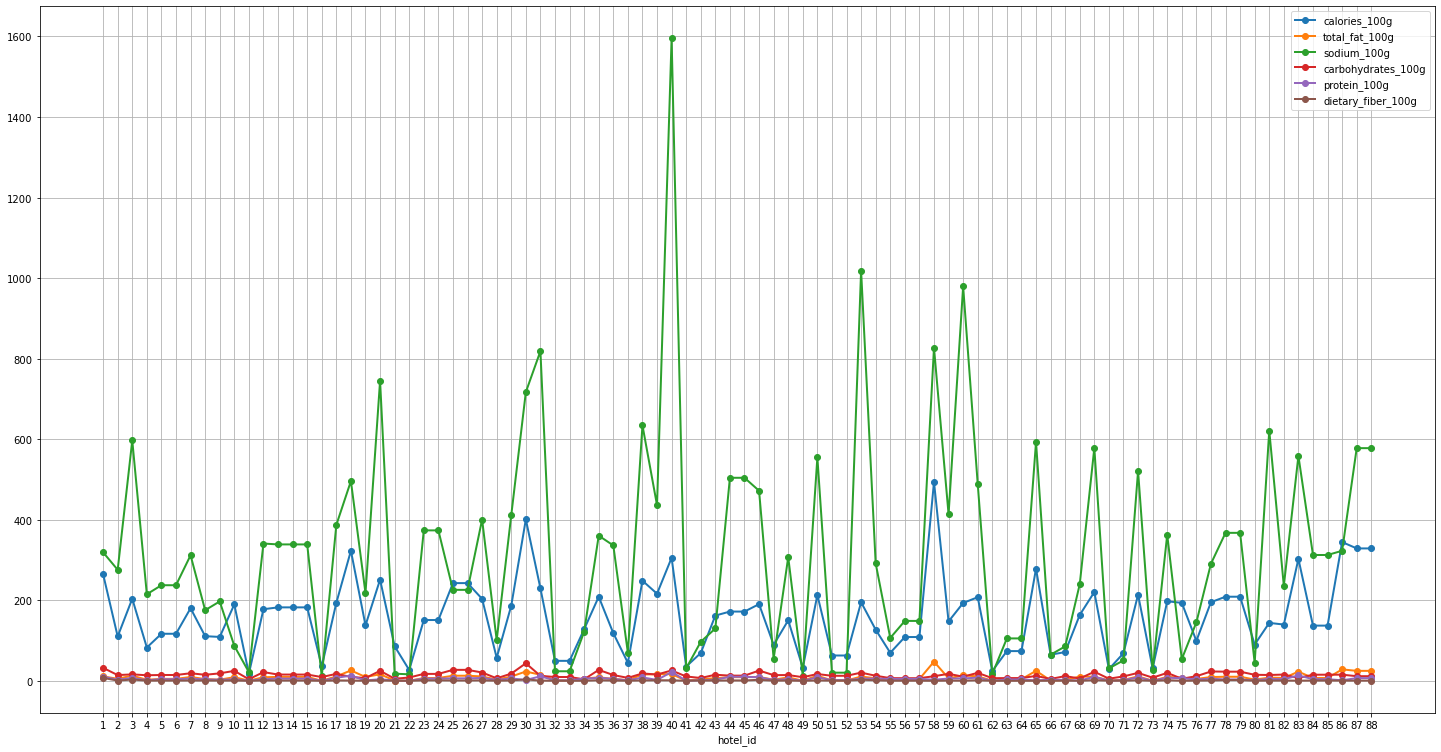

In [41]:
fnl_2_3.plot(x="hotel_id", y=["calories_100g", "total_fat_100g","sodium_100g","carbohydrates_100g","protein_100g","dietary_fiber_100g"],xticks=fnl_2_3['hotel_id'],rot=0, figsize=(25, 13), style='o-',linewidth=2,grid=True)
plt.show()

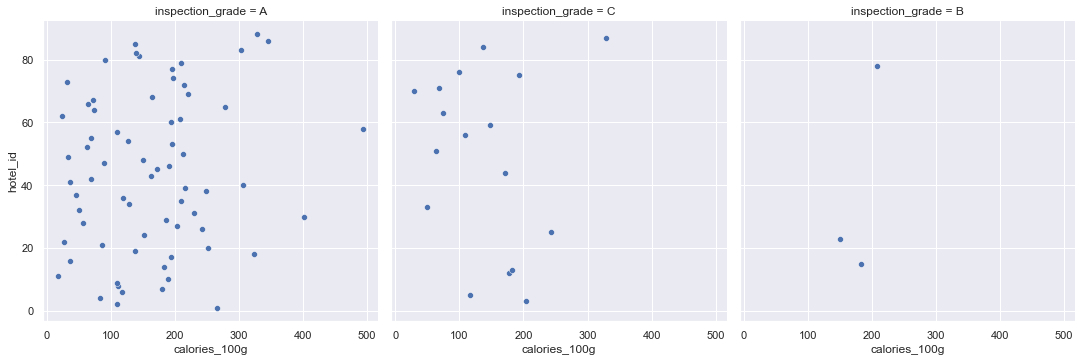

In [42]:
sns.set(font_scale=2)
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(5,5)})
sns.relplot(y='hotel_id',x='calories_100g',data=fnl_2_3,col='inspection_grade',ci=None)

In [43]:
'''
# This will add title to plot
gfg.set_title( "GFG - GFG")
  
# This will add label to X-axis
gfg.set_xlabel( "GFG X") 
# This will add label to Y-axis
gfg.set_ylabel( "GFG Y")
'''

'\n# This will add title to plot\ngfg.set_title( "GFG - GFG")\n  \n# This will add label to X-axis\ngfg.set_xlabel( "GFG X") \n# This will add label to Y-axis\ngfg.set_ylabel( "GFG Y")\n'

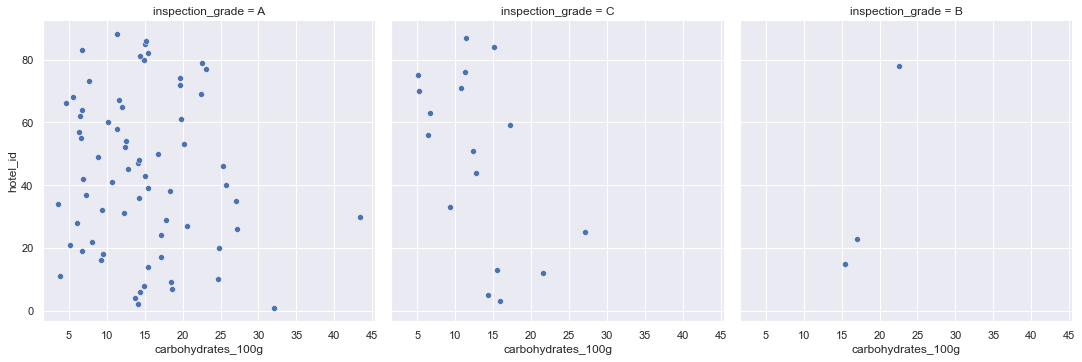

In [44]:
sns.set(font_scale=2)
sns.set_style("darkgrid",{"axes.facecolor": ".9"})
sns.set(rc={'figure.figsize':(5,5)})
sns.relplot(y='hotel_id',x='carbohydrates_100g',data=fnl_2_3,palette="Accent_r", col='inspection_grade')

In [45]:
#sns.pairplot(fnl_2_3, palette='Accent_r')


C:\Users\AMD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


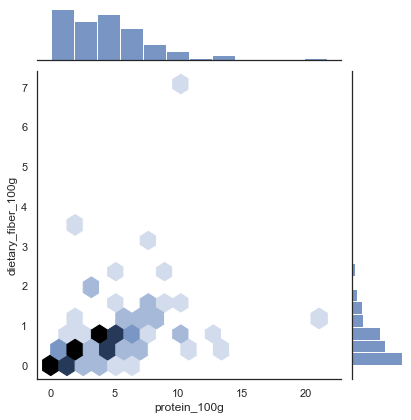

In [46]:
with sns.axes_style('white'):
    sns.jointplot("protein_100g", "dietary_fiber_100g", data=fnl_2_3, kind='hex')

<AxesSubplot:xlabel='dietary_fiber_100g', ylabel='Density'>

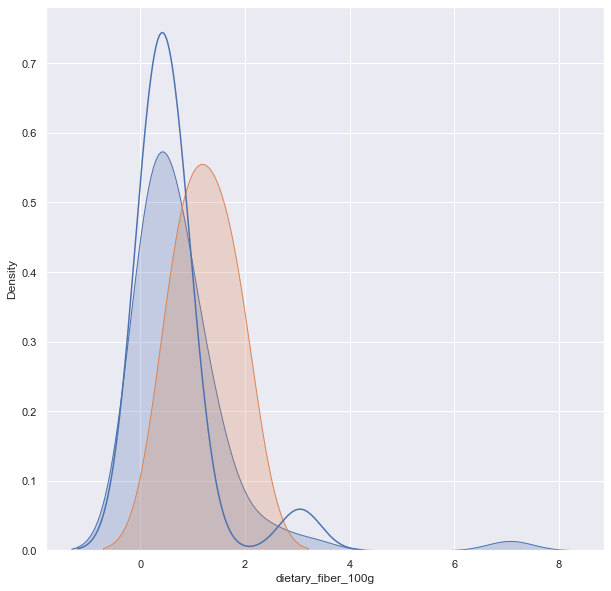

In [47]:
sns.set(font_scale=2)
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,10)})
sns.kdeplot(fnl_2_3.dietary_fiber_100g[fnl_2_3.inspection_grade=='A'], label='A Grade', shade=True)
sns.kdeplot(fnl_2_3.dietary_fiber_100g[fnl_2_3.inspection_grade=='B'], label='B Grade', shade=True)
sns.kdeplot(fnl_2_3.dietary_fiber_100g[fnl_2_3.inspection_grade=='C'], label='C Grade', shade=False)


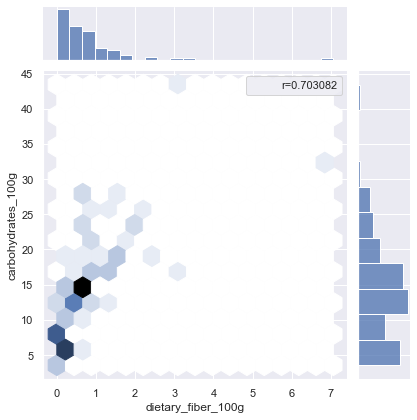

In [48]:
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')
graph = sns.jointplot(x="dietary_fiber_100g", y="carbohydrates_100g", data=fnl_2_3, kind='hex')
r, p = stats.pearsonr(fnl_2_3.dietary_fiber_100g, fnl_2_3.carbohydrates_100g)
# if you choose to write your own legend, then you should adjust the properties then
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method

graph.ax_joint.legend([phantom],['r={:f}'.format(r)])

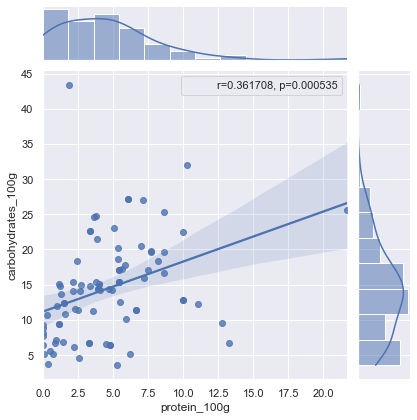

In [49]:
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')
graph = sns.jointplot(x="protein_100g", y="carbohydrates_100g", data=fnl_2_3, kind='reg')
r, p = stats.pearsonr(fnl_2_3.protein_100g, fnl_2_3.carbohydrates_100g)
# if you choose to write your own legend, then you should adjust the properties then
phantom, = graph.ax_joint.plot([], [], linestyle="", alpha=0)
# here graph is not a ax but a joint grid, so we access the axis through ax_joint method

graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])

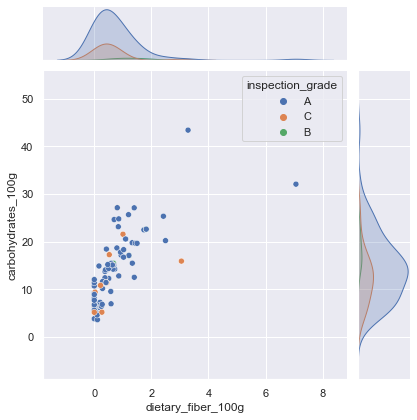

In [50]:
import scipy.stats as stats
sns.jointplot(data=fnl_2_3, x="dietary_fiber_100g", y="carbohydrates_100g", hue="inspection_grade")



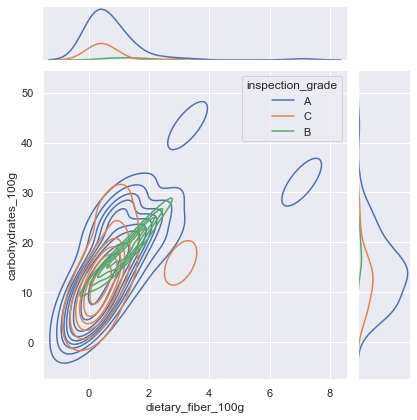

In [51]:
#kind="kde"
sns.jointplot(data=fnl_2_3, x="dietary_fiber_100g", y="carbohydrates_100g", hue="inspection_grade",kind="kde")

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='Density'>

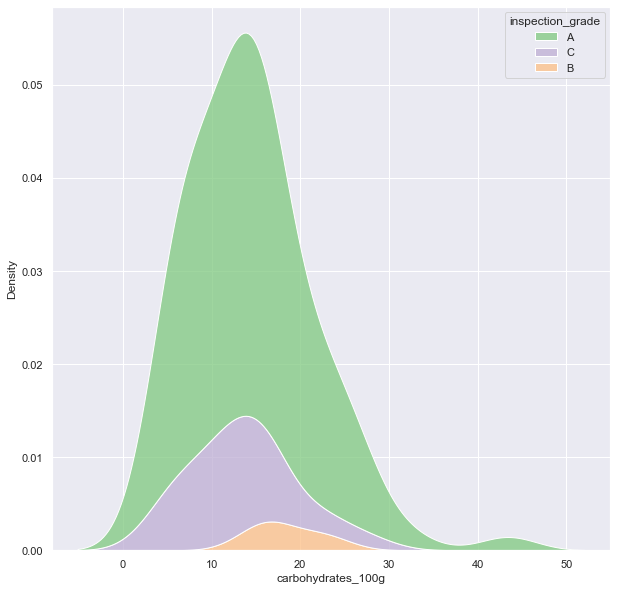

In [52]:
sns.set(font_scale=1)
sns.kdeplot(data= fnl_2_3, x="carbohydrates_100g", hue="inspection_grade",palette='Accent',multiple="stack")
#BuPu_r

<AxesSubplot:xlabel='dietary_fiber_100g', ylabel='Density'>

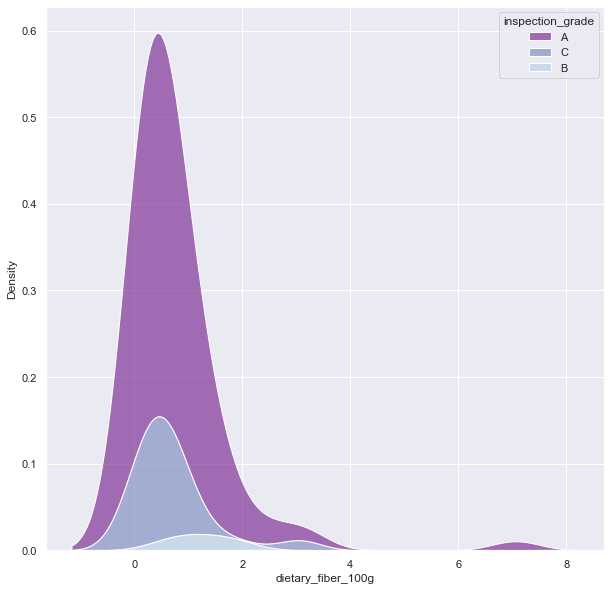

In [53]:
sns.set(font_scale=1)
sns.kdeplot(data= fnl_2_3, x="dietary_fiber_100g", hue="inspection_grade",palette='BuPu_r',multiple="stack")

<AxesSubplot:xlabel='protein_100g', ylabel='Density'>

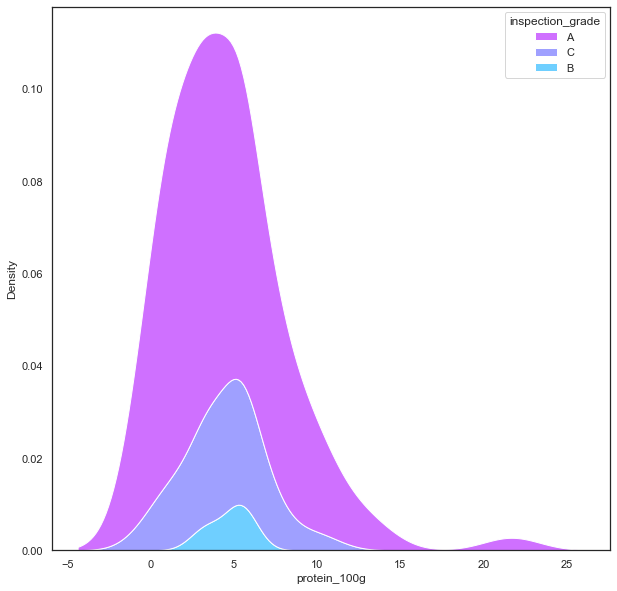

In [54]:
sns.set(font_scale=1)
sns.set_style("white")
sns.kdeplot(data= fnl_2_3, x="protein_100g", hue="inspection_grade",palette='cool_r',multiple="stack")

<AxesSubplot:xlabel='total_fat_100g', ylabel='Density'>

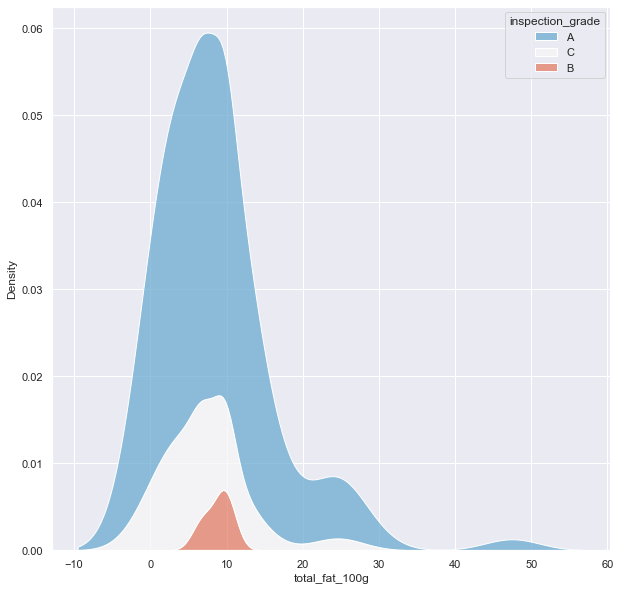

In [55]:
sns.set(font_scale=1)
sns.kdeplot(data= fnl_2_3, x="total_fat_100g", hue="inspection_grade",palette='RdBu_r',multiple="stack")

<AxesSubplot:xlabel='calories_100g', ylabel='Density'>

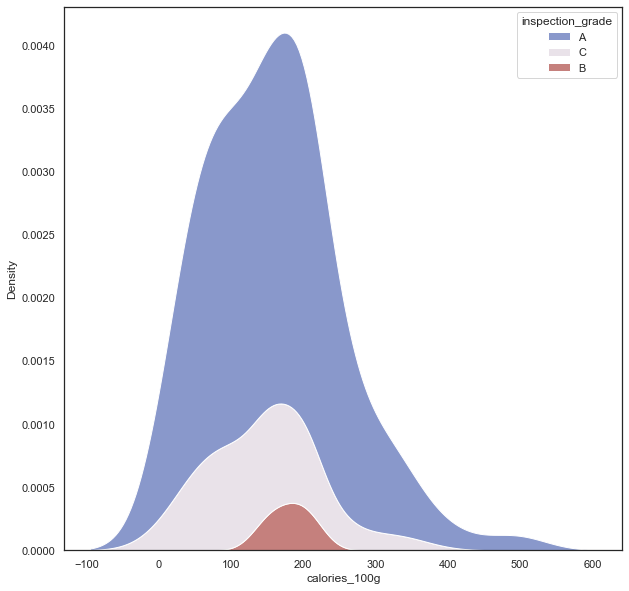

In [56]:
#saturated_fat_100g
sns.set(font_scale=1)
sns.set_style("white")
sns.kdeplot(data= fnl_2_3, x="calories_100g", hue="inspection_grade",palette='twilight_shifted',multiple="stack")